# Import necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and merge datasets

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')



In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [5]:

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])


In [6]:
# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

In [7]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
wines.to_csv('wines.csv')

In [5]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


# Understand dataset features and values

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [6]:
subset = ['volatile acidity','residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2

In [15]:
subset = ['volatile acidity','residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'quality']
rs = round(red_wine[subset].describe(),2)
ws = round(white_wine[subset].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                                \
         volatile acidity residual sugar total sulfur dioxide sulphates   
count             1599.00        1599.00              1599.00   1599.00   
mean                 0.53           2.54                46.47      0.66   
std                  0.18           1.41                32.90      0.17   
min                  0.12           0.90                 6.00      0.33   
25%                  0.39           1.90                22.00      0.55   
50%                  0.52           2.20                38.00      0.62   
75%                  0.64           2.60                62.00      0.73   
max                  1.58          15.50               289.00      2.00   

                        White Wine Statistics                 \
       alcohol  quality      volatile acidity residual sugar   
count  1599.00  1599.00               4898.00        4898.00   
mean     10.42     5.64                  0.28           6.39   
std       1.07     0.81                  0.10           5.07   
min       8.40     3.00                  0.08           0.60   
25%       9.50     5.00                  0.21           1.70   
50%      10.20     6.00                  0.26           5.20   
75%      11.10     6.00                  0.32           9.90   
max      14.90     8.00                  1.10          65.80   

                                                        
      total sulfur dioxide sulphates  alcohol  quality  
count              4898.00   4898.00  4898.00  4898.00  
mean                138.36      0.49    10.51     5.88  
std                  42.50      0.11     1.23     0.89  
min                   9.00      0.22     8.00     3.00  
25%                 108.00      0.41     9.50     5.00  
50%                 134.00      0.47    10.40     6.00  
75%                 167.00      0.55    11.40     6.00  
max                 440.00      1.08    14.20     9.00

In [16]:
subset1 = [ 'volatile acidity', 'pH','alcohol', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset1].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset1].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset1].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                            Medium Quality Wine  \
      volatile acidity       pH  alcohol  quality    volatile acidity   
count          2384.00  2384.00  2384.00  2384.00             3915.00   
mean              0.40     3.21     9.87     4.88                0.31   
std               0.19     0.16     0.84     0.36                0.14   
min               0.10     2.74     8.00     3.00                0.08   
25%               0.26     3.11     9.30     5.00                0.21   
50%               0.34     3.20     9.60     5.00                0.27   
75%               0.50     3.31    10.40     5.00                0.36   
max               1.58     3.90    14.90     5.00                1.04   

                                 High Quality Wine                          
            pH  alcohol  quality  volatile acidity      pH alcohol quality  
count  3915.00  3915.00  3915.00            198.00  198.00  198.00  198.00  
mean      3.22    10.81     6.28              0.29    3.23   11.69    8.03  
std       0.16     1.20     0.45              0.12    0.16    1.27    0.16  
min       2.72     8.40     6.00              0.12    2.88    8.50    8.00  
25%       3.11     9.80     6.00              0.21    3.13   11.00    8.00  
50%       3.21    10.80     6.00              0.28    3.23   12.00    8.00  
75%       3.33    11.70     7.00              0.35    3.33   12.60    8.00  
max       4.01    14.20     7.00              0.85    3.72   14.00    9.00

# Univariate Analysis

## Visualizing one dimension

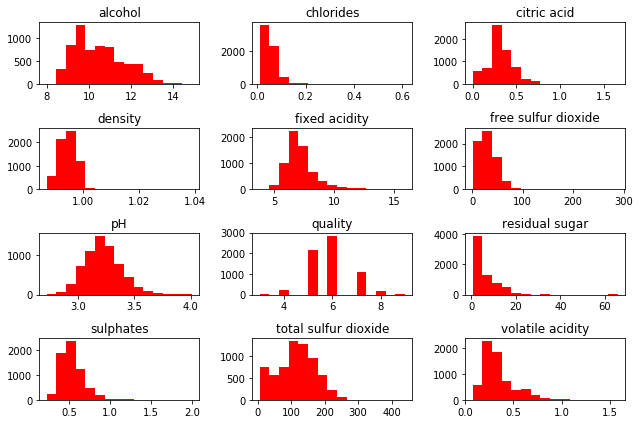

In [21]:
wines.hist(bins=15, color='red', linewidth=1.0,
              xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

### Continuous, numeric attribute in 1-D

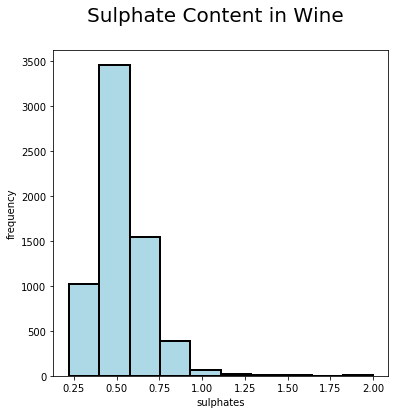

In [41]:
figure = plt.figure(figsize=(6,6))
ax = figure.add_subplot(1,1,1)
ax.set_xlabel("sulphates")
ax.set_ylabel("frequency")
ax.hist(wines['sulphates'], color='lightblue',
                                    edgecolor='black', linewidth=2)

title = figure.suptitle("Sulphate Content in Wine", fontsize=20)


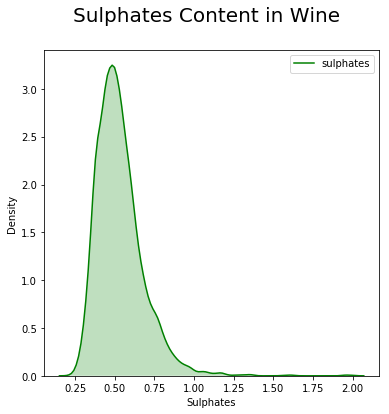

In [45]:
figure = plt.figure(figsize = (6, 6))
title = figure.suptitle("Sulphates Content in Wine", fontsize=20)


ax1 = figure.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(wines['sulphates'], ax = ax1, shade=True, color='green')

### Discrete, categorical attribute in 1-D

<BarContainer object of 7 artists>

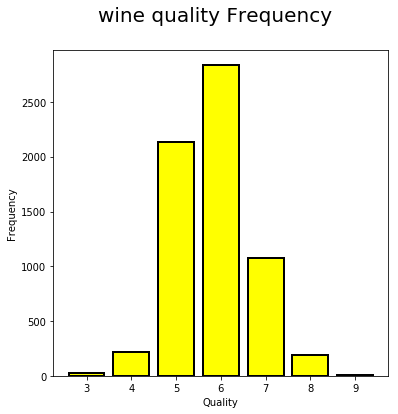

In [54]:
figure = plt.figure(figsize=(6,6))
title = figure.suptitle("wine quality Frequency", fontsize = 20)
ax = figure.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency")
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.bar(w_q[0], w_q[1], color='yellow', 
        edgecolor='black', linewidth=2)



# Multivariate Analysis

## Visualizing two dimensions

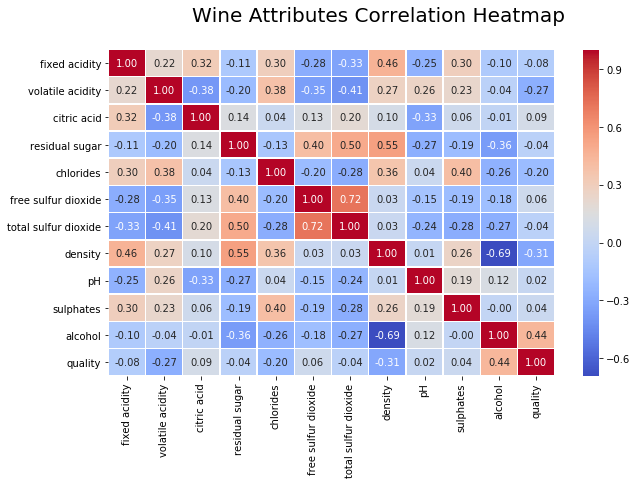

In [60]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.5)

t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=20 )

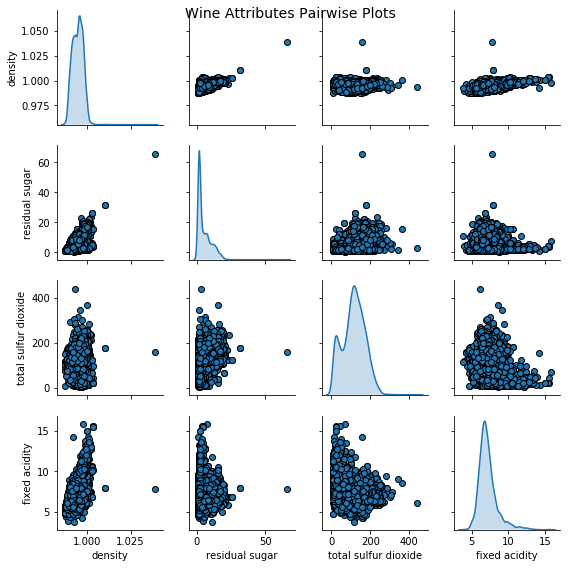

In [62]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=2, aspect=1,
                  plot_kws = dict(edgecolor="k", linewidth=1),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 

title = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [65]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.166089,white
1,0.301278,-0.681719,0.305311,0.373895,red
2,-0.859324,0.411306,0.305311,-0.320370,white
3,0.408001,1.210056,1.189993,-0.706073,white
4,1.395180,1.777588,2.003900,0.142473,white


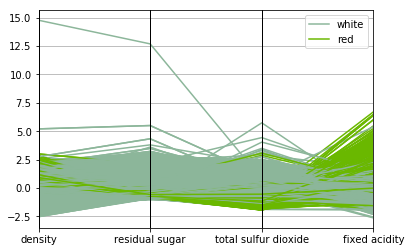

In [66]:
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'wine_type')

### Two Continuous Numeric attributes 

Text(0.5,1,'Wine Sulphates - Alcohol Content')

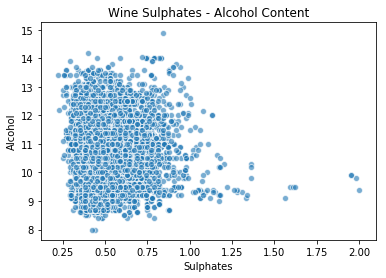

In [73]:
plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.6, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


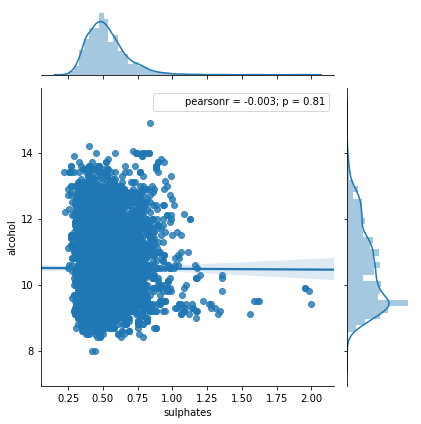

In [76]:
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
              kind='reg', space=0.2, ratio=4)

### Two Discrete Categorical attributes 

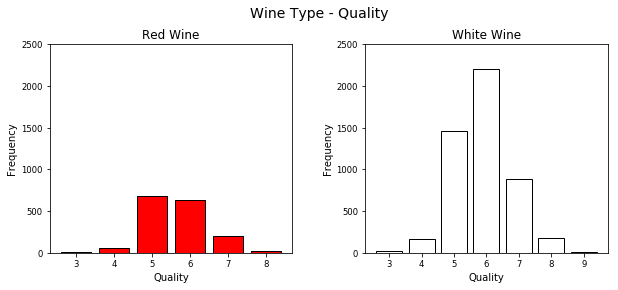

In [78]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

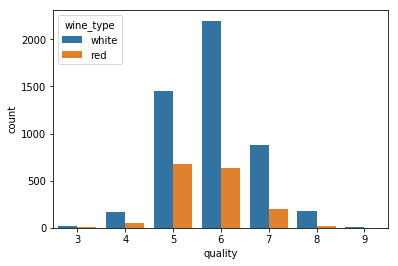

In [80]:
cp = sns.countplot(x="quality", hue="wine_type", data=wines)

### Mixed attributes (numeric & categorical)

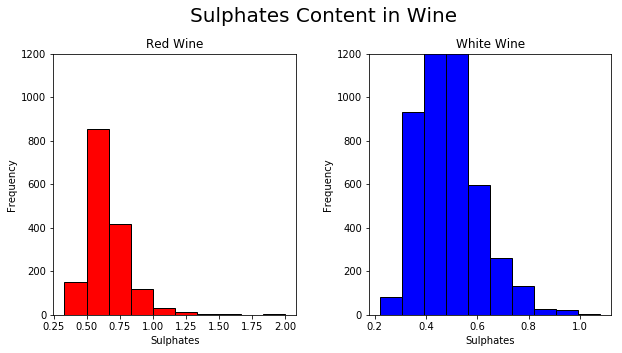

In [92]:
fig = plt.figure(figsize = (10,5))
title = fig.suptitle("Sulphates Content in Wine", fontsize=20)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])

r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', 
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])

w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='blue', 
                                     edgecolor='black', linewidth=1)

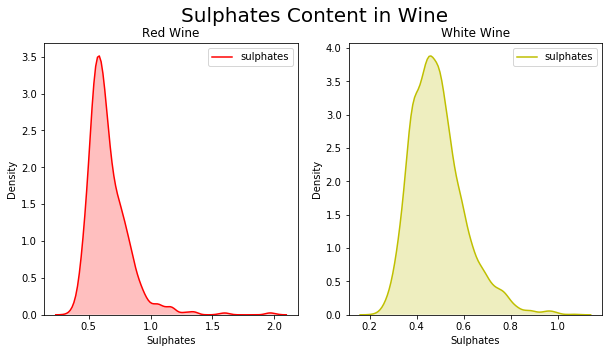

In [93]:
fig = plt.figure(figsize = (10, 5))
title = fig.suptitle("Sulphates Content in Wine", fontsize=20)


ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


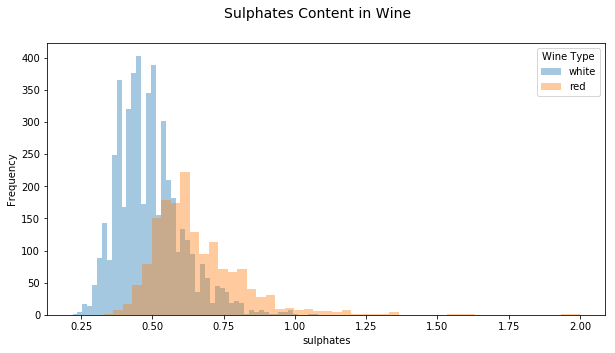

In [99]:
fig = plt.figure(figsize = (10,5))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type')
g.map(sns.distplot, 'sulphates', kde=False, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

Text(0,0.5,'Wine Alcohol %')

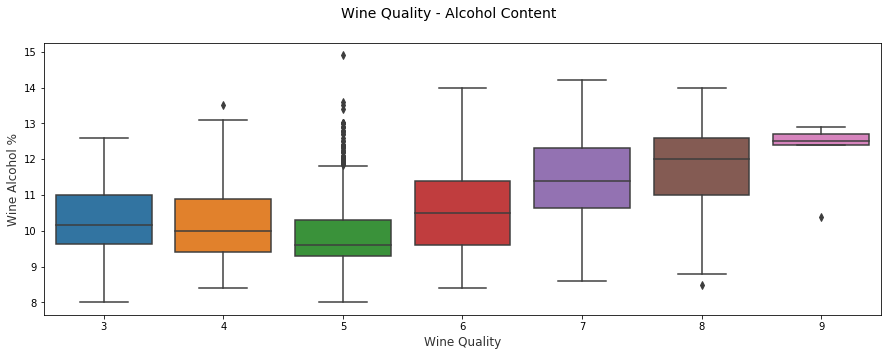

In [106]:
f,(ax) = plt.subplots(1, 1, figsize=(15, 5))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Text(0,0.5,'Wine Sulphates')

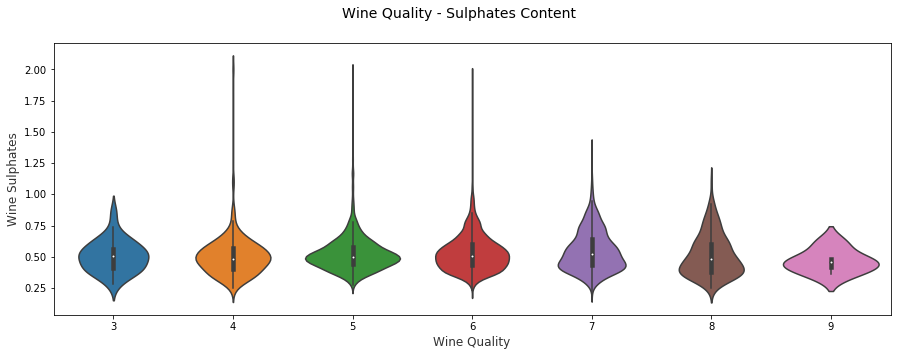

In [107]:
f, (ax) = plt.subplots(1, 1, figsize=(15, 5))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

## Visualizing three dimensions

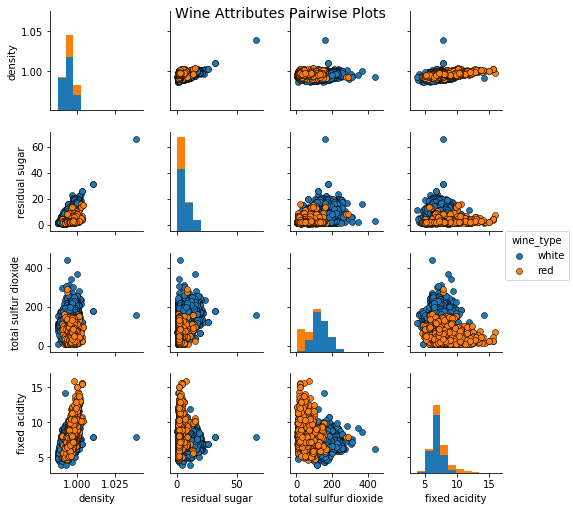

In [110]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 
        'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 

t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

### Three Continuous Numeric attributes

Text(0.5,0,'Alcohol')

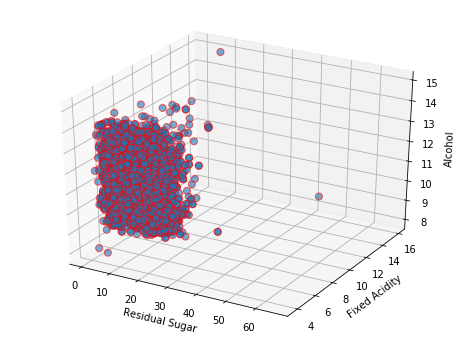

In [111]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='r')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

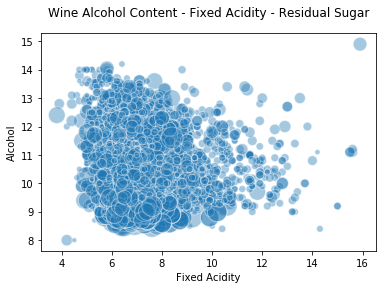

In [25]:
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)

### Three Discrete Categorical attributes

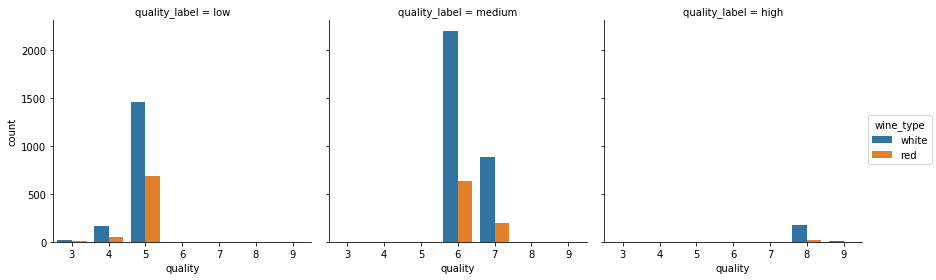

In [112]:
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count")

### Mixed attributes (Numeric & Categorical)

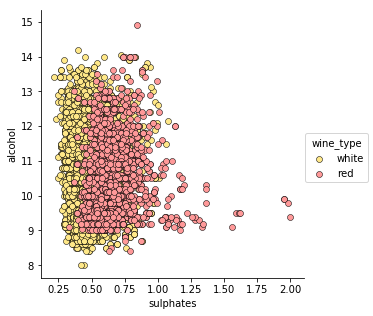

In [27]:
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type",
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

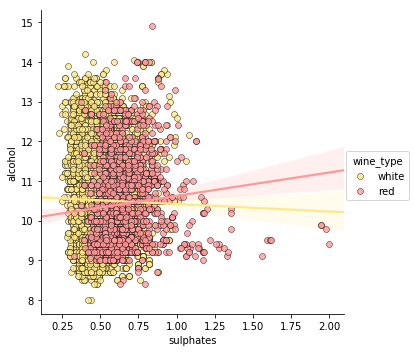

In [28]:
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

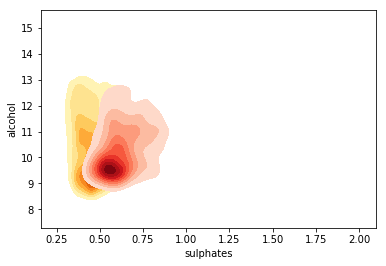

In [29]:
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)

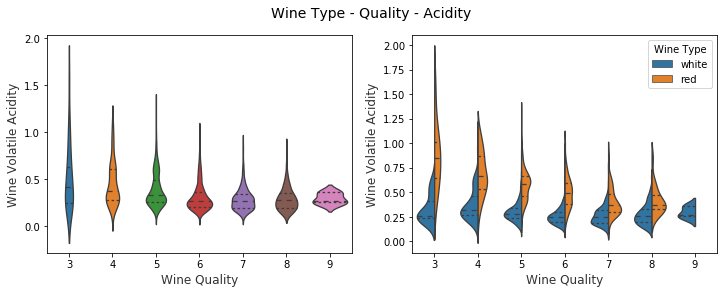

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
                ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

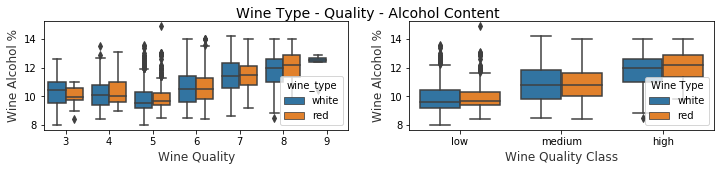

In [116]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines,  ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines,  ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

## Visualizing four dimensions

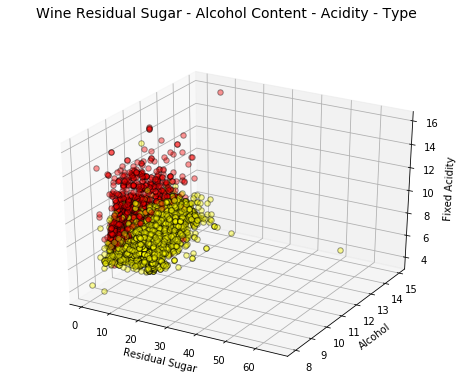

In [32]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5,1.05,'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

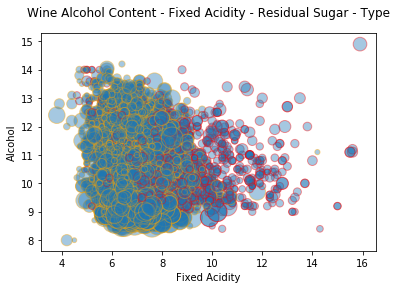

In [118]:
size = wines['residual sugar']*25

edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4,  edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

## Visualizing five dimensions

Text(0.5,0,'Fixed Acidity')

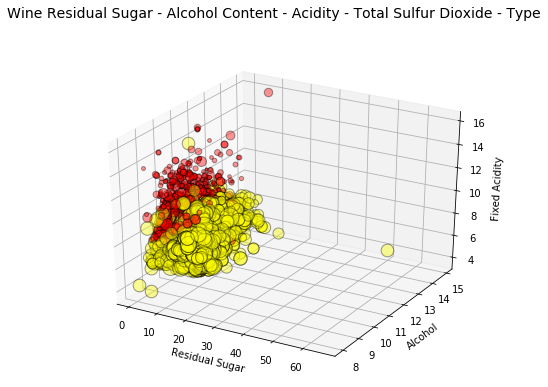

In [119]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')